In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import poppy
from poppy.poppy_core import PlaneType
import astropy.units as u
import astropy.io.fits as fits

In [2]:
# Derived from HST example
diam = 0.3 * u.m
fl_pri = 1.143451 * u.m
d_pri_sec = 0.549337630333726 * u.m
fl_sec = -0.0467579189727913 * u.m
d_sec_to_focus = 0.589999999989853 * u.m
m2_rad = 0.059 * u.m
m2_strut_width = 0.01 * u.m
m2_supports = 5

hst = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=512, beam_ratio=0.25)
m1 = poppy.QuadraticLens(fl_pri, name='Primary')
m2 = poppy.QuadraticLens(fl_sec, name='Secondary')

hst.add_optic(poppy.CircularAperture(radius=diam.value/2))
hst.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                 support_width=m2_strut_width,
                                 support_angle_offset=90, n_supports=m2_supports))
hst.add_optic(m1)
hst.add_optic(m2, distance=d_pri_sec)
hst.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=d_sec_to_focus);


hst.describe()



	Entrance pupil diam:  0.3 m	npix: 512	Beam ratio:0.25
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Lens: Primary, with focal length 1.143451 m
	Propagation distance:  0.549337630333726 m
	Lens: Secondary, with focal length -0.0467579189727913 m
	Propagation distance:  0.589999999989853 m
	Image plane: focus (Analytic)


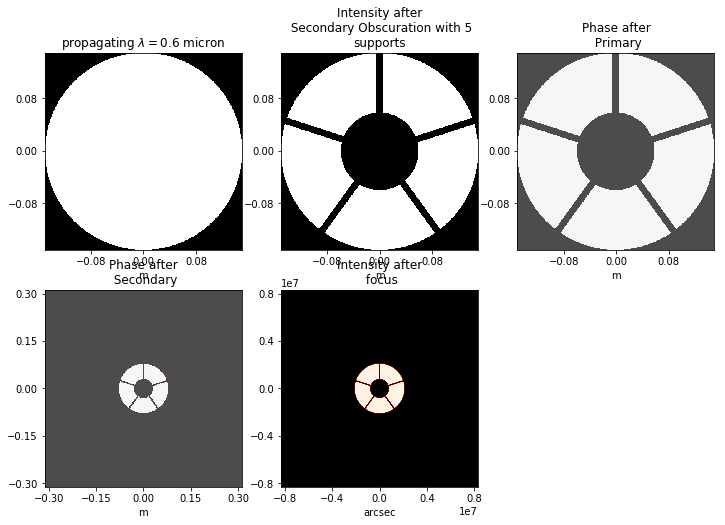

In [3]:
plt.figure(figsize=(12,8))
psf, waves = hst.calcPSF(wavelength=0.6e-6, display_intermediates=True, return_intermediates=True)


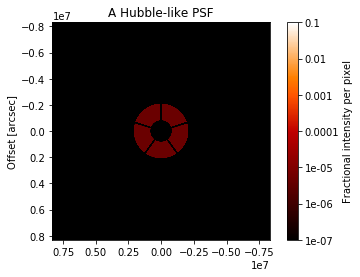

In [4]:
poppy.display_PSF(psf,imagecrop=1.8)
plt.title('A Hubble-like PSF')
plt.ylabel("Offset [arcsec]");